In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [4]:
data=pd.read_csv(r"C:\Users\ytaj3\OneDrive\Desktop\car_price_prediction.csv")

In [5]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
data.shape

(19237, 18)

In [8]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
data.shape

(18924, 18)

In [12]:
min(data.Price)

1

In [13]:
max(data.Price)

26307500

In [14]:
data.drop("Doors",axis=1,inplace=True)

In [15]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [16]:
data=data.replace("-",np.nan)

In [17]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [18]:
data.shape

(18924, 17)

In [16]:
data["Levy"].isnull().sum()

0

In [17]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Airbags'}>, <Axes: >]], dtype=object)

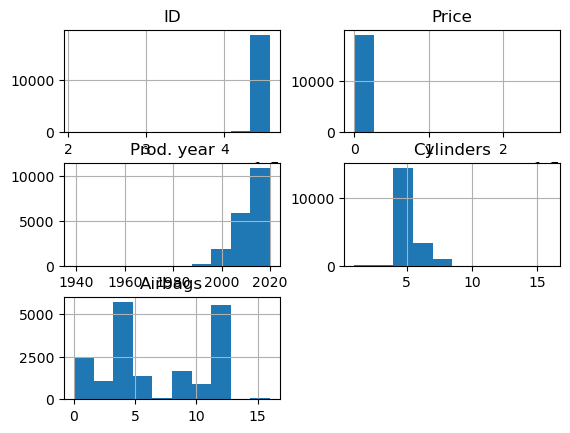

In [18]:
data.hist()

In [19]:
data["ID"].skew()

-11.902636059622207

In [20]:
data["ID"],lambda_val=boxcox(data.ID)

C:\Users\ytaj3\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ytaj3\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [21]:
data.ID.skew()

nan

In [22]:
data["Price"].skew()

135.38772637953886

In [23]:
data["Price"],lambda_val=boxcox(data.Price)

In [24]:
data.Price.skew()

0.29421243577953987

In [25]:
data["Prod. year"].skew()

-2.0885953286111087

In [32]:
data["Prod.year"],lambda_val=boxcox(data["Prod. year"])

In [39]:
data["Prod .year"]skew()

SyntaxError: invalid syntax (3298994921.py, line 1)

In [50]:
data["Cylinders"].skew()

2.107707309180976

In [33]:
data["Cylinders"],lambda_val=boxcox(data.Cylinders)

In [34]:
data["Cylinders"].skew()

-0.2267285566559883

In [35]:
encoder=LabelEncoder()

In [36]:
data["Levy"]=encoder.fit_transform(data.Levy)
data["Model"]=encoder.fit_transform(data.Model)
data["Category"]=encoder.fit_transform(data.Category)
data["Leather interior"]=encoder.fit_transform(data['Leather interior'])
data["Engine volume	"]=encoder.fit_transform(data['Engine volume']	)
data["Mileage"]=encoder.fit_transform(data.Mileage)
data["Cylinders"]=encoder.fit_transform(data.Cylinders)
data["Gear box type"]=encoder.fit_transform(data['Gear box type'])
data["Drive wheels"]=encoder.fit_transform(data['Drive wheels'])
data["Color"]=encoder.fit_transform(data.Color)	
data["Airbags"]=encoder.fit_transform(data.Airbags)

In [37]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Prod.year,Engine volume\t
0,6.124580e+152,46.382455,114,LEXUS,1242,2010,4,1,Hybrid,3.5,2838,5,0,0,Left wheel,12,12,7.985892e+152,63
1,4.061162e+152,49.530716,4,CHEVROLET,658,2011,4,0,Petrol,3,2960,5,2,0,Left wheel,1,8,8.173946e+152,56
2,6.456749e+152,40.486648,0,HONDA,684,2006,3,0,Petrol,1.3,3140,3,3,1,Right-hand drive,1,2,7.275115e+152,22
3,6.441913e+152,31.215850,512,FORD,661,2011,4,1,Hybrid,2.5,2413,3,0,0,Left wheel,14,0,8.173946e+152,46
4,6.556349e+152,44.642712,366,HONDA,684,2014,3,1,Petrol,1.3,7396,3,0,1,Left wheel,12,4,8.764487e+152,22


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Model'}>],
       [<Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'Leather interior'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gear box type'}>,
        <Axes: title={'center': 'Drive wheels'}>,
        <Axes: title={'center': 'Color'}>],
       [<Axes: title={'center': 'Airbags'}>,
        <Axes: title={'center': 'Prod.year'}>,
        <Axes: title={'center': 'Engine volume\t'}>, <Axes: >]],
      dtype=object)

C:\Users\ytaj3\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\ytaj3\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


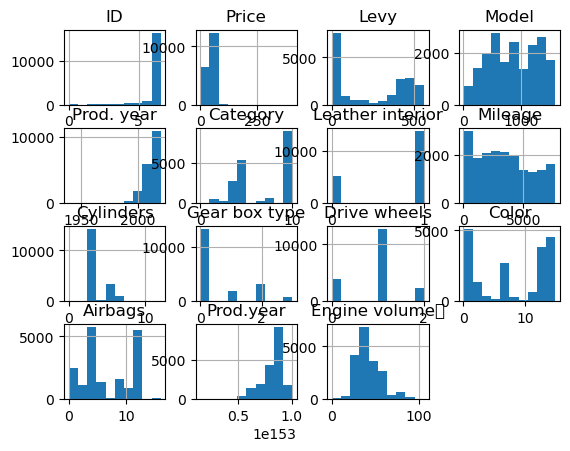

In [38]:
data.hist()